In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Coluna 'CBO Ocupação 2002' está com tipos mistos

df_rais_2019_rs = pd.read_csv('df_rais_2019_RS.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# Mantendo cópia do df rs original para verificações

df_rais_2019_rs_verif = df_rais_2019_rs.copy()

In [ ]:
df_rais_2019_rs.head()

,Bairros SP,Bairros Fortaleza,Bairros RJ,Causa Afastamento 1,Causa Afastamento 2,Causa Afastamento 3,Motivo Desligamento,CBO Ocupação 2002,CNAE 2.0 Classe,CNAE 95 Classe,Distritos SP,Vínculo Ativo 31/12,Faixa Etária,Faixa Hora Contrat,Faixa Remun Dezem (SM),Faixa Remun Média (SM),Faixa Tempo Emprego,Escolaridade após 2005,Qtd Hora Contr,Idade,Ind CEI Vinculado,Ind Simples,Mês Admissão,Mês Desligamento,Mun Trab,Município,Nacionalidade,Natureza Jurídica,Ind Portador Defic,Qtd Dias Afastamento,Raça Cor,Regiões Adm DF,Vl Remun Dezembro Nom,Vl Remun Dezembro (SM),Vl Remun Média Nom,Vl Remun Média (SM),CNAE 2.0 Subclasse,Sexo Trabalhador,Tamanho Estabelecimento,Tempo Emprego,Tipo Admissão,Tipo Estab,Tipo Estab.1,Tipo Defic,Tipo Vínculo,IBGE Subsetor,Vl Rem Janeiro CC,Vl Rem Fevereiro CC,Vl Rem Março CC,Vl Rem Abril CC,Vl Rem Maio CC,Vl Rem Junho CC,Vl Rem Julho CC,Vl Rem Agosto CC,Vl Rem Setembro CC,Vl Rem Outubro CC,Vl Rem Novembro CC,Ano Chegada Brasil,Ind Trab Intermitente,Ind Trab Parcial
0,{ñ class},{ñ class},{ñ class},99,99,99,11,717020,41204,45217,{ñ class},0,7,6,0,2,4,1,44,52,0,1,0,7,431140,431675,10,2305,0,0,8,0,"0000000000,00","000000,00","0000001342,62","000001,34",4120400,1,4,"15,2",0,1,CNPJ,0,10,15,"000001516,37","000001611,15","000001421,60","000001421,60","000001421,60","000000663,42","000000000,00","000000000,00","000000000,00","000000000,00","000000000,00",0,0,0
1,{ñ class},{ñ class},{ñ class},99,99,99,11,764005,15319,19313,{ñ class},0,5,6,0,3,3,1,44,35,0,0,0,3,431990,431990,10,2305,0,0,2,0,"0000000000,00","000000,00","0000001562,41","000001,56",1531901,1,5,"7,6",0,1,CNPJ,0,10,12,"000001621,77","000001503,05","000000000,00","000000000,00","000000000,00","000000000,00","000000000,00","000000000,00","000000000,00","000000000,00","000000000,00",0,0,0
2,{ñ class},{ñ class},{ñ class},99,99,99,11,773340,16102,20109,{ñ class},0,6,6,0,2,3,1,44,44,0,1,1,8,0,431390,10,2062,0,0,8,0,"0000000000,00","000000,00","0000001301,93","000001,30",1610203,1,2,"6,4",2,1,CNPJ,0,10,7,"000001457,57","000001458,84","000001457,60","000001404,99","000001486,10","000001440,86","000000407,58","000000000,00","000000000,00","000000000,00","000000000,00",0,0,0
3,{ñ class},{ñ class},{ñ class},99,99,99,12,514320,81214,74705,{ñ class},0,4,5,0,99,1,1,40,25,0,0,4,4,431490,431490,10,2062,0,0,2,0,"0000000000,00","000000,00","0000000000,00","000000,00",8121400,1,10,"0,9",2,1,CNPJ,0,60,21,"000000000,00","000000000,00","000000000,00","000000000,00","000000000,00","000000000,00","000000000,00","000000000,00","000000000,00","000000000,00","000000000,00",0,0,0
4,{ñ class},{ñ class},{ñ class},99,99,99,10,514320,47440,52442,{ñ class},0,7,6,0,2,4,1,44,64,0,1,0,4,0,431410,10,2062,0,0,2,0,"0000000000,00","000000,00","0000001196,88","000001,19",4744099,1,2,"13,0",0,1,CNPJ,0,10,16,"000001165,46","000001294,96","000001208,66","000001118,45","000000000,00","000000000,00","000000000,00","000000000,00","000000000,00","000000000,00","000000000,00",0,0,0


In [ ]:
df_rais_2019_rs.shape

(4189461, 60)

In [ ]:
# Primeira limpeza de colunas

columns_exclude1 = ['Bairros SP',	'Bairros Fortaleza',	'Bairros RJ',	'Causa Afastamento 1',	'Causa Afastamento 2',	'Causa Afastamento 3',
                    'CNAE 2.0 Classe',	'CNAE 95 Classe', 'Distritos SP', 'Faixa Remun Média (SM)', 'Ind CEI Vinculado',	'Ind Simples',
                    'Mês Admissão',	'Mês Desligamento',	'Mun Trab',	'Município', 	'Regiões Adm DF',
                    'Vl Remun Média (SM)',	'CNAE 2.0 Subclasse', 'Tipo Estab',	'Tipo Estab.1',	'Tipo Defic',	'Tipo Vínculo',
                    'IBGE Subsetor',	'Vl Rem Janeiro CC',	'Vl Rem Fevereiro CC',	'Vl Rem Março CC',	'Vl Rem Abril CC',	'Vl Rem Maio CC',
                    'Vl Rem Junho CC', 'Vl Rem Julho CC',	'Vl Rem Agosto CC',	'Vl Rem Setembro CC',	'Vl Rem Outubro CC',	'Vl Rem Novembro CC',
                    'Ano Chegada Brasil']

In [ ]:
df_rais_2019_rs.drop(columns=columns_exclude1, inplace=True)

In [ ]:
# Modificando Salários Dezembro para float

df_rais_2019_rs['Vl Remun Dezembro Nom'] = df_rais_2019_rs['Vl Remun Dezembro Nom'].str.replace(',','.')

df_rais_2019_rs['Vl Remun Dezembro Nom'] = pd.to_numeric(df_rais_2019_rs['Vl Remun Dezembro Nom'])


In [ ]:
df_rais_2019_rs['Vl Remun Dezembro Nom'].value_counts()

0.00        1437674
998.00        11179
1294.34        7237
1500.00        5829
1345.46        5687
             ...   
24194.22          1
570.47            1
344.54            1
4103.53           1
8497.29           1
Name: Vl Remun Dezembro Nom, Length: 628075, dtype: int64

In [ ]:
df_rais_2019_rs.head()

,Motivo Desligamento,CBO Ocupação 2002,Vínculo Ativo 31/12,Faixa Etária,Faixa Hora Contrat,Faixa Remun Dezem (SM),Faixa Tempo Emprego,Escolaridade após 2005,Qtd Hora Contr,Idade,Nacionalidade,Natureza Jurídica,Ind Portador Defic,Qtd Dias Afastamento,Raça Cor,Vl Remun Dezembro Nom,Vl Remun Dezembro (SM),Vl Remun Média Nom,Sexo Trabalhador,Tamanho Estabelecimento,Tempo Emprego,Tipo Admissão,Ind Trab Intermitente,Ind Trab Parcial
0,11,717020,0,7,6,0,4,1,44,52,10,2305,0,0,8,0.0,"000000,00","0000001342,62",1,4,"15,2",0,0,0
1,11,764005,0,5,6,0,3,1,44,35,10,2305,0,0,2,0.0,"000000,00","0000001562,41",1,5,"7,6",0,0,0
2,11,773340,0,6,6,0,3,1,44,44,10,2062,0,0,8,0.0,"000000,00","0000001301,93",1,2,"6,4",2,0,0
3,12,514320,0,4,5,0,1,1,40,25,10,2062,0,0,2,0.0,"000000,00","0000000000,00",1,10,"0,9",2,0,0
4,10,514320,0,7,6,0,4,1,44,64,10,2062,0,0,2,0.0,"000000,00","0000001196,88",1,2,"13,0",0,0,0


In [ ]:
# Faixa etária 99 é ignorado

df_rais_2019_rs['Faixa Etária'].value_counts()

5     1218719
6      870266
3      694766
7      673988
4      617046
8       63171
2       50663
1         836
99          6
Name: Faixa Etária, dtype: int64

In [ ]:
# Removendo instâncias com o 99 na faixa etária

df_rais_2019_rs = df_rais_2019_rs[df_rais_2019_rs['Faixa Etária'] != 99]

In [ ]:
# Modificando para Faixa Etária iniciar em 0

df_rais_2019_rs['Faixa Etária'] = df_rais_2019_rs['Faixa Etária'].apply(lambda x: x-1)

In [ ]:
df_rais_2019_rs.shape

(4189455, 24)

In [ ]:
# Faixa Hora Contrat 99 é ignorado

df_rais_2019_rs['Faixa Hora Contrat'].value_counts()

6     2933344
5      721685
4      214344
3      199585
99      64623
1       48567
2        7307
Name: Faixa Hora Contrat, dtype: int64

In [ ]:
# Removendo instâncias com o 99 na Faixa Hora Contrat

df_rais_2019_rs = df_rais_2019_rs[df_rais_2019_rs['Faixa Hora Contrat'] != 99]

In [ ]:
# Modificando para Faixa Hora Contrat iniciar em 0

df_rais_2019_rs['Faixa Hora Contrat'] = df_rais_2019_rs['Faixa Hora Contrat'].apply(lambda x: x-1)

In [ ]:
# Faixa Tempo Emprego 99 é ignorado

df_rais_2019_rs['Faixa Tempo Emprego'].value_counts()

7     627884
4     625603
8     618811
1     563626
3     551152
6     423937
5     360816
2     344082
99      8921
Name: Faixa Tempo Emprego, dtype: int64

In [ ]:
# Removendo instâncias com o 99 na Faixa Tempo Emprego

df_rais_2019_rs = df_rais_2019_rs[df_rais_2019_rs['Faixa Tempo Emprego'] != 99]

In [ ]:
# Modificando para Faixa Tempo Emprego iniciar em 0

df_rais_2019_rs['Faixa Tempo Emprego'] = df_rais_2019_rs['Faixa Tempo Emprego'].apply(lambda x: x-1)

In [ ]:
# Também sem valores ignorados

df_rais_2019_rs['Tamanho Estabelecimento'].value_counts()

10    645505
5     561344
4     505477
2     491331
7     453935
3     436796
6     367088
8     303546
9     272965
1      77924
Name: Tamanho Estabelecimento, dtype: int64

In [ ]:
df_rais_2019_rs['Tamanho Estabelecimento'] = df_rais_2019_rs['Tamanho Estabelecimento'].apply(lambda x: x-1)

In [ ]:
# Sem valores ignorados

df_rais_2019_rs['Escolaridade após 2005'].value_counts()

7     1854074
9      695394
5      414330
6      354315
4      322331
8      251802
2       89367
3       86484
10      26963
11      12662
1        8189
Name: Escolaridade após 2005, dtype: int64

In [ ]:
# Modificando para Escolaridade após 2005 iniciar em 0

df_rais_2019_rs['Escolaridade após 2005'] = df_rais_2019_rs['Escolaridade após 2005'].apply(lambda x: x-1)

In [ ]:
df_rais_2019_rs['Escolaridade após 2005'].value_counts()

6     1854074
8      695394
4      414330
5      354315
3      322331
7      251802
1       89367
2       86484
9       26963
10      12662
0        8189
Name: Escolaridade após 2005, dtype: int64

In [ ]:
df_rais_2019_rs['Ind Portador Defic'].value_counts()

0    4071253
1      44658
Name: Ind Portador Defic, dtype: int64

In [ ]:
df_rais_2019_rs['Motivo Desligamento'].value_counts().head(10)

0     2902689
11     560995
21     307787
12     239691
31      42803
90      18554
10      13463
70       7123
60       4422
71       3217
Name: Motivo Desligamento, dtype: int64

In [ ]:
# Os números de pessoas NÃO DESLIGADAS NO ANO (célula anterior) e com VÍNCULO ATIVO em 31/12 são muito parecidos
# Isso faz sentido pois se não teve desligamento algum, então tem que estar com o vínculo ativo em 31/12

df_rais_2019_rs['Vínculo Ativo 31/12'].value_counts()

1    2907108
0    1208803
Name: Vínculo Ativo 31/12, dtype: int64

In [ ]:
df_rais_2019_rs[df_rais_2019_rs['Motivo Desligamento'] == 0].head()

,Motivo Desligamento,CBO Ocupação 2002,Vínculo Ativo 31/12,Faixa Etária,Faixa Hora Contrat,Faixa Remun Dezem (SM),Faixa Tempo Emprego,Escolaridade após 2005,Qtd Hora Contr,Idade,Nacionalidade,Natureza Jurídica,Ind Portador Defic,Qtd Dias Afastamento,Raça Cor,Vl Remun Dezembro Nom,Vl Remun Dezembro (SM),Vl Remun Média Nom,Sexo Trabalhador,Tamanho Estabelecimento,Tempo Emprego,Tipo Admissão,Ind Trab Intermitente,Ind Trab Parcial
1231840,0,514320,1,5,5,5,6,0,44,44,10,2062,0,0,8,2415.83,"000002,42","0000001964,60",1,2,"87,9",0,0,0
1231841,0,632125,1,5,5,5,6,0,44,45,10,2062,0,0,2,2052.76,"000002,05","0000001580,20",1,4,"80,9",0,0,0
1231842,0,622010,1,6,5,4,0,0,44,54,10,2062,0,0,2,1618.17,"000001,62","0000001708,97",1,9,"2,5",2,0,0
1231843,0,514320,1,4,4,3,2,0,40,37,10,2062,0,0,2,1287.62,"000001,29","0000001385,20",1,9,"7,3",2,0,0
1231844,0,514310,1,6,4,3,5,0,40,55,10,2062,0,30,2,1418.99,"000001,42","0000001459,18",1,8,"45,5",0,0,0


In [ ]:
# Mesmo mantendo no dataset apenas pessoas com vínculo ativo em 31/12, ainda assim apareceram pessoas sem salário em dezembro
# Mantendo apenas pessoas com a remuneração diferente de 0 em dezembro, com vínculo ativo em 31/12

df_rais_2019_rs = df_rais_2019_rs[(df_rais_2019_rs['Vl Remun Dezembro Nom'] != 0) & (df_rais_2019_rs['Vínculo Ativo 31/12'] == 1)]

In [ ]:
# Mantendo também apenas pessoas que não trabalham com regime de intermitente, mas as pessoas com regime parcial serão mantidas

# As medidas dessas células são para tentar garantir que constem apenas salários integrais em dezembro,
# sem valores prejudicados por demissão ou outro fator

# A coluna tipo salário (se mensal, quinzenal, por tarefa etc) não veio no dataset, apesar de constar no xls do layout

df_rais_2019_rs = df_rais_2019_rs[(df_rais_2019_rs['Ind Trab Intermitente'] == 0)]

In [ ]:
# Mantendo ainda apenas pessoas sem desligamento

df_rais_2019_rs = df_rais_2019_rs[df_rais_2019_rs['Motivo Desligamento'] == 0]

In [ ]:
df_rais_2019_rs['CBO Ocupação 2002'].value_counts()

521110    106454
411005    100085
411010     85487
514320     78980
784205     62068
           ...  
234652         1
915215         1
643015         1
513325         1
316340         1
Name: CBO Ocupação 2002, Length: 4341, dtype: int64

In [ ]:
# Segunda limpeza de colunas

columns_exclude2 = ['Motivo Desligamento', 'Vínculo Ativo 31/12', 'Faixa Remun Dezem (SM)', 'Qtd Dias Afastamento', 'Vl Remun Dezembro (SM)',
                    'Qtd Hora Contr', 'Idade', 'Nacionalidade', 'Natureza Jurídica', 'Tempo Emprego',	'Tipo Admissão', 'Ind Trab Intermitente',
                    'Ind Trab Parcial']

In [ ]:
df_rais_2019_rs.drop(columns=columns_exclude2, inplace=True)

In [ ]:
# Coluna CBO estava com dados mistos entre string e int

df_rais_2019_rs['CBO Ocupação 2002'] = df_rais_2019_rs['CBO Ocupação 2002'].astype(str)

In [ ]:
# Apenas Ocupações CBO das Famílias ANALISTAS DE TECNOLOGIA DA INFORMAÇÃO (2124), ADMINISTRADORES DE TECNOLOGIA DA INFORMAÇÃO (2123),
# ENGENHEIROS EM COMPUTAÇÃO (2122), DIRETORES DE TECNOLOGIA DA INFORMAÇÃO (1236), GERENTES DE TECNOLOGIA DA INFORMAÇÃO (1425)

df_rais_2019_rs = df_rais_2019_rs[df_rais_2019_rs['CBO Ocupação 2002'].str.startswith('2124')\
                                    | df_rais_2019_rs['CBO Ocupação 2002'].str.startswith('2123')\
                                    | df_rais_2019_rs['CBO Ocupação 2002'].str.startswith('2122')\
                                    | df_rais_2019_rs['CBO Ocupação 2002'].str.startswith('1236')\
                                    | df_rais_2019_rs['CBO Ocupação 2002'].str.startswith('1425')]


In [ ]:
df_rais_2019_rs_ti = df_rais_2019_rs.copy()

In [ ]:
df_rais_2019_rs_ti.shape

(19318, 11)

In [ ]:
df_rais_2019_rs_ti.head()

,CBO Ocupação 2002,Faixa Etária,Faixa Hora Contrat,Faixa Tempo Emprego,Escolaridade após 2005,Ind Portador Defic,Raça Cor,Vl Remun Dezembro Nom,Vl Remun Média Nom,Sexo Trabalhador,Tamanho Estabelecimento
1231877,212405,3,5,0,0,0,2,2992.22,"0000003033,61",1,7
1232763,212420,3,5,6,0,0,2,9273.57,"0000010882,90",1,6
1232905,212305,5,4,3,0,0,2,7918.54,"0000006671,85",1,4
1232916,212420,4,4,3,0,0,2,5564.71,"0000005850,75",1,4
1235270,212405,3,5,0,0,0,2,7000.00,"0000006999,99",1,5


In [ ]:
df_rais_2019_rs_ti[df_rais_2019_rs_ti['Vl Remun Dezembro Nom'] == 0].shape

(0, 11)

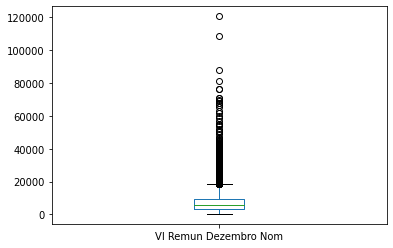

In [ ]:
# Analisando outliers

df_rais_2019_rs_ti['Vl Remun Dezembro Nom'].plot.box()

In [ ]:
df_rais_2019_rs_ti['Vl Remun Dezembro Nom'].value_counts()

2000.00     68
3000.00     61
2500.00     55
4000.00     51
3500.00     50
            ..
5229.19      1
760.76       1
11522.36     1
2056.70      1
736.00       1
Name: Vl Remun Dezembro Nom, Length: 16704, dtype: int64

In [ ]:
df_rais_2019_rs_ti['Vl Remun Dezembro Nom'].value_counts().index.sort_values()

Float64Index([   335.97,    346.84,    354.26,     375.8,    387.64,    398.35,
                 398.71,     400.0,    404.54,     405.0,
              ...
               69172.41,  69657.04,  70857.17,  71056.14,  76385.25,  76652.66,
               81047.74,  87924.21, 108700.52, 120653.69],
             dtype='float64', length=16704)

In [ ]:
df_rais_2019_rs_ti['Vl Remun Dezembro Nom'].value_counts().index.sort_values()[:100]

Float64Index([335.97, 346.84, 354.26,  375.8, 387.64, 398.35, 398.71,  400.0,
              404.54,  405.0, 413.62, 427.66, 466.66, 486.67, 500.82, 509.95,
               513.2,  514.7, 515.67, 517.03, 527.97,  540.8, 552.37, 553.03,
              561.67, 561.99, 577.77, 583.33,  585.0,  592.3, 596.88,  600.0,
               614.0,  618.2, 618.57, 624.69,  650.0,  652.0, 660.05, 661.37,
               668.0, 669.26, 683.44, 686.68, 690.31, 691.95,  692.5, 697.65,
               710.7, 720.65, 728.61, 733.89,  733.9,  736.0,  738.0, 744.26,
              744.64,  751.5, 752.31, 752.78, 760.76, 767.14, 774.08,  775.6,
              778.52, 781.02, 781.54, 786.54, 791.01,  800.0, 807.81,  812.9,
              821.62,  825.0, 829.09, 829.74,  840.0,  841.1, 844.55, 847.12,
              847.32, 854.28, 855.36, 869.21, 874.02, 879.42,  880.6, 881.26,
               882.0, 883.45,  886.5, 889.26,  892.5, 895.14,  900.0, 900.01,
              904.62,  917.7,  927.7, 934.45],
             dtyp

In [ ]:
df_rais_2019_rs_verif.head()

,Bairros SP,Bairros Fortaleza,Bairros RJ,Causa Afastamento 1,Causa Afastamento 2,Causa Afastamento 3,Motivo Desligamento,CBO Ocupação 2002,CNAE 2.0 Classe,CNAE 95 Classe,Distritos SP,Vínculo Ativo 31/12,Faixa Etária,Faixa Hora Contrat,Faixa Remun Dezem (SM),Faixa Remun Média (SM),Faixa Tempo Emprego,Escolaridade após 2005,Qtd Hora Contr,Idade,Ind CEI Vinculado,Ind Simples,Mês Admissão,Mês Desligamento,Mun Trab,Município,Nacionalidade,Natureza Jurídica,Ind Portador Defic,Qtd Dias Afastamento,Raça Cor,Regiões Adm DF,Vl Remun Dezembro Nom,Vl Remun Dezembro (SM),Vl Remun Média Nom,Vl Remun Média (SM),CNAE 2.0 Subclasse,Sexo Trabalhador,Tamanho Estabelecimento,Tempo Emprego,Tipo Admissão,Tipo Estab,Tipo Estab.1,Tipo Defic,Tipo Vínculo,IBGE Subsetor,Vl Rem Janeiro CC,Vl Rem Fevereiro CC,Vl Rem Março CC,Vl Rem Abril CC,Vl Rem Maio CC,Vl Rem Junho CC,Vl Rem Julho CC,Vl Rem Agosto CC,Vl Rem Setembro CC,Vl Rem Outubro CC,Vl Rem Novembro CC,Ano Chegada Brasil,Ind Trab Intermitente,Ind Trab Parcial
0,{ñ class},{ñ class},{ñ class},99,99,99,11,717020,41204,45217,{ñ class},0,7,6,0,2,4,1,44,52,0,1,0,7,431140,431675,10,2305,0,0,8,0,"0000000000,00","000000,00","0000001342,62","000001,34",4120400,1,4,"15,2",0,1,CNPJ,0,10,15,"000001516,37","000001611,15","000001421,60","000001421,60","000001421,60","000000663,42","000000000,00","000000000,00","000000000,00","000000000,00","000000000,00",0,0,0
1,{ñ class},{ñ class},{ñ class},99,99,99,11,764005,15319,19313,{ñ class},0,5,6,0,3,3,1,44,35,0,0,0,3,431990,431990,10,2305,0,0,2,0,"0000000000,00","000000,00","0000001562,41","000001,56",1531901,1,5,"7,6",0,1,CNPJ,0,10,12,"000001621,77","000001503,05","000000000,00","000000000,00","000000000,00","000000000,00","000000000,00","000000000,00","000000000,00","000000000,00","000000000,00",0,0,0
2,{ñ class},{ñ class},{ñ class},99,99,99,11,773340,16102,20109,{ñ class},0,6,6,0,2,3,1,44,44,0,1,1,8,0,431390,10,2062,0,0,8,0,"0000000000,00","000000,00","0000001301,93","000001,30",1610203,1,2,"6,4",2,1,CNPJ,0,10,7,"000001457,57","000001458,84","000001457,60","000001404,99","000001486,10","000001440,86","000000407,58","000000000,00","000000000,00","000000000,00","000000000,00",0,0,0
3,{ñ class},{ñ class},{ñ class},99,99,99,12,514320,81214,74705,{ñ class},0,4,5,0,99,1,1,40,25,0,0,4,4,431490,431490,10,2062,0,0,2,0,"0000000000,00","000000,00","0000000000,00","000000,00",8121400,1,10,"0,9",2,1,CNPJ,0,60,21,"000000000,00","000000000,00","000000000,00","000000000,00","000000000,00","000000000,00","000000000,00","000000000,00","000000000,00","000000000,00","000000000,00",0,0,0
4,{ñ class},{ñ class},{ñ class},99,99,99,10,514320,47440,52442,{ñ class},0,7,6,0,2,4,1,44,64,0,1,0,4,0,431410,10,2062,0,0,2,0,"0000000000,00","000000,00","0000001196,88","000001,19",4744099,1,2,"13,0",0,1,CNPJ,0,10,16,"000001165,46","000001294,96","000001208,66","000001118,45","000000000,00","000000000,00","000000000,00","000000000,00","000000000,00","000000000,00","000000000,00",0,0,0


In [ ]:
df_rais_2019_rs_ti[df_rais_2019_rs_ti['Vl Remun Dezembro Nom'] == 335.97]

,CBO Ocupação 2002,Faixa Etária,Faixa Hora Contrat,Faixa Tempo Emprego,Escolaridade após 2005,Ind Portador Defic,Raça Cor,Vl Remun Dezembro Nom,Vl Remun Média Nom,Sexo Trabalhador,Tamanho Estabelecimento
2659696,142515,6,5,6,8,0,2,335.97,"0000008902,33",1,4


In [ ]:
df_rais_2019_rs_verif[(df_rais_2019_rs_verif['Vl Remun Dezembro Nom'] == '0000000335,97') & (df_rais_2019_rs_verif['CBO Ocupação 2002'] == 142515)]

,Bairros SP,Bairros Fortaleza,Bairros RJ,Causa Afastamento 1,Causa Afastamento 2,Causa Afastamento 3,Motivo Desligamento,CBO Ocupação 2002,CNAE 2.0 Classe,CNAE 95 Classe,Distritos SP,Vínculo Ativo 31/12,Faixa Etária,Faixa Hora Contrat,Faixa Remun Dezem (SM),Faixa Remun Média (SM),Faixa Tempo Emprego,Escolaridade após 2005,Qtd Hora Contr,Idade,Ind CEI Vinculado,Ind Simples,Mês Admissão,Mês Desligamento,Mun Trab,Município,Nacionalidade,Natureza Jurídica,Ind Portador Defic,Qtd Dias Afastamento,Raça Cor,Regiões Adm DF,Vl Remun Dezembro Nom,Vl Remun Dezembro (SM),Vl Remun Média Nom,Vl Remun Média (SM),CNAE 2.0 Subclasse,Sexo Trabalhador,Tamanho Estabelecimento,Tempo Emprego,Tipo Admissão,Tipo Estab,Tipo Estab.1,Tipo Defic,Tipo Vínculo,IBGE Subsetor,Vl Rem Janeiro CC,Vl Rem Fevereiro CC,Vl Rem Março CC,Vl Rem Abril CC,Vl Rem Maio CC,Vl Rem Junho CC,Vl Rem Julho CC,Vl Rem Agosto CC,Vl Rem Setembro CC,Vl Rem Outubro CC,Vl Rem Novembro CC,Ano Chegada Brasil,Ind Trab Intermitente,Ind Trab Parcial
2659696,{ñ class},{ñ class},{ñ class},99,99,99,0,142515,74901,74993,{ñ class},1,7,6,1,8,7,9,44,60,0,0,0,0,431490,431490,10,2062,0,30,2,0,"0000000335,97","000000,33","0000008902,33","000008,91",7490199,1,5,"119,8",0,1,CNPJ,0,10,19,"000009592,67","000009592,67","000009592,67","000009592,67","000009592,67","000009592,67","000009592,67","000009592,67","000009592,67","000010079,02","000010079,02",0,0,0


In [ ]:
df_rais_2019_rs_ti[df_rais_2019_rs_ti['Vl Remun Dezembro Nom'] == 596.88]

,CBO Ocupação 2002,Faixa Etária,Faixa Hora Contrat,Faixa Tempo Emprego,Escolaridade após 2005,Ind Portador Defic,Raça Cor,Vl Remun Dezembro Nom,Vl Remun Média Nom,Sexo Trabalhador,Tamanho Estabelecimento
2103066,212420,5,1,7,6,0,2,596.88,"0000000604,01",1,3


In [ ]:
df_rais_2019_rs_verif[(df_rais_2019_rs_verif['Vl Remun Dezembro Nom'] == '0000000596,88') & (df_rais_2019_rs_verif['CBO Ocupação 2002'] == 212420)]

,Bairros SP,Bairros Fortaleza,Bairros RJ,Causa Afastamento 1,Causa Afastamento 2,Causa Afastamento 3,Motivo Desligamento,CBO Ocupação 2002,CNAE 2.0 Classe,CNAE 95 Classe,Distritos SP,Vínculo Ativo 31/12,Faixa Etária,Faixa Hora Contrat,Faixa Remun Dezem (SM),Faixa Remun Média (SM),Faixa Tempo Emprego,Escolaridade após 2005,Qtd Hora Contr,Idade,Ind CEI Vinculado,Ind Simples,Mês Admissão,Mês Desligamento,Mun Trab,Município,Nacionalidade,Natureza Jurídica,Ind Portador Defic,Qtd Dias Afastamento,Raça Cor,Regiões Adm DF,Vl Remun Dezembro Nom,Vl Remun Dezembro (SM),Vl Remun Média Nom,Vl Remun Média (SM),CNAE 2.0 Subclasse,Sexo Trabalhador,Tamanho Estabelecimento,Tempo Emprego,Tipo Admissão,Tipo Estab,Tipo Estab.1,Tipo Defic,Tipo Vínculo,IBGE Subsetor,Vl Rem Janeiro CC,Vl Rem Fevereiro CC,Vl Rem Março CC,Vl Rem Abril CC,Vl Rem Maio CC,Vl Rem Junho CC,Vl Rem Julho CC,Vl Rem Agosto CC,Vl Rem Setembro CC,Vl Rem Outubro CC,Vl Rem Novembro CC,Ano Chegada Brasil,Ind Trab Intermitente,Ind Trab Parcial
2103066,{ñ class},{ñ class},{ñ class},99,99,99,0,212420,60101,92215,{ñ class},1,6,2,2,1,8,7,15,40,0,0,0,0,0,430090,10,3069,0,0,2,0,"0000000596,88","000000,59","0000000604,01","000000,60",6010100,1,4,"138,9",0,1,CNPJ,0,10,21,"000000640,22","000000573,98","000000758,92","000000604,28","000000579,50","000000579,50","000000579,50","000000579,50","000000579,50","000000579,50","000000596,88",0,0,0


In [ ]:
df_rais_2019_rs_ti[df_rais_2019_rs_ti['Vl Remun Dezembro Nom'] == 413.62]

,CBO Ocupação 2002,Faixa Etária,Faixa Hora Contrat,Faixa Tempo Emprego,Escolaridade após 2005,Ind Portador Defic,Raça Cor,Vl Remun Dezembro Nom,Vl Remun Média Nom,Sexo Trabalhador,Tamanho Estabelecimento
2778829,212320,4,5,1,8,0,2,413.62,"0000005448,81",1,2


In [ ]:
df_rais_2019_rs_verif[(df_rais_2019_rs_verif['Vl Remun Dezembro Nom'] == '0000000413,62') & (df_rais_2019_rs_verif['CBO Ocupação 2002'] == 212320)]

,Bairros SP,Bairros Fortaleza,Bairros RJ,Causa Afastamento 1,Causa Afastamento 2,Causa Afastamento 3,Motivo Desligamento,CBO Ocupação 2002,CNAE 2.0 Classe,CNAE 95 Classe,Distritos SP,Vínculo Ativo 31/12,Faixa Etária,Faixa Hora Contrat,Faixa Remun Dezem (SM),Faixa Remun Média (SM),Faixa Tempo Emprego,Escolaridade após 2005,Qtd Hora Contr,Idade,Ind CEI Vinculado,Ind Simples,Mês Admissão,Mês Desligamento,Mun Trab,Município,Nacionalidade,Natureza Jurídica,Ind Portador Defic,Qtd Dias Afastamento,Raça Cor,Regiões Adm DF,Vl Remun Dezembro Nom,Vl Remun Dezembro (SM),Vl Remun Média Nom,Vl Remun Média (SM),CNAE 2.0 Subclasse,Sexo Trabalhador,Tamanho Estabelecimento,Tempo Emprego,Tipo Admissão,Tipo Estab,Tipo Estab.1,Tipo Defic,Tipo Vínculo,IBGE Subsetor,Vl Rem Janeiro CC,Vl Rem Fevereiro CC,Vl Rem Março CC,Vl Rem Abril CC,Vl Rem Maio CC,Vl Rem Junho CC,Vl Rem Julho CC,Vl Rem Agosto CC,Vl Rem Setembro CC,Vl Rem Outubro CC,Vl Rem Novembro CC,Ano Chegada Brasil,Ind Trab Intermitente,Ind Trab Parcial
2778829,{ñ class},{ñ class},{ñ class},99,99,99,0,212320,62040,72109,{ñ class},1,5,6,1,7,2,9,44,37,0,0,7,0,0,431490,10,2062,0,0,2,0,"0000000413,62","000000,41","0000005448,81","000005,45",6204000,1,3,"5,9",4,1,CNPJ,0,10,19,"000000000,00","000000000,00","000000000,00","000000000,00","000000000,00","000000000,00","000005693,75","000006292,33","000006266,21","000007822,72","000006204,28",0,0,0


In [ ]:
df_rais_2019_rs_ti[df_rais_2019_rs_ti['Vl Remun Dezembro Nom'] == 781.54]

,CBO Ocupação 2002,Faixa Etária,Faixa Hora Contrat,Faixa Tempo Emprego,Escolaridade após 2005,Ind Portador Defic,Raça Cor,Vl Remun Dezembro Nom,Vl Remun Média Nom,Sexo Trabalhador,Tamanho Estabelecimento
2257962,142530,4,5,6,6,0,2,781.54,"0000002087,26",1,5


In [ ]:
df_rais_2019_rs_verif[(df_rais_2019_rs_verif['Vl Remun Dezembro Nom'] == '0000000781,54') & (df_rais_2019_rs_verif['CBO Ocupação 2002'] == 142530)]

,Bairros SP,Bairros Fortaleza,Bairros RJ,Causa Afastamento 1,Causa Afastamento 2,Causa Afastamento 3,Motivo Desligamento,CBO Ocupação 2002,CNAE 2.0 Classe,CNAE 95 Classe,Distritos SP,Vínculo Ativo 31/12,Faixa Etária,Faixa Hora Contrat,Faixa Remun Dezem (SM),Faixa Remun Média (SM),Faixa Tempo Emprego,Escolaridade após 2005,Qtd Hora Contr,Idade,Ind CEI Vinculado,Ind Simples,Mês Admissão,Mês Desligamento,Mun Trab,Município,Nacionalidade,Natureza Jurídica,Ind Portador Defic,Qtd Dias Afastamento,Raça Cor,Regiões Adm DF,Vl Remun Dezembro Nom,Vl Remun Dezembro (SM),Vl Remun Média Nom,Vl Remun Média (SM),CNAE 2.0 Subclasse,Sexo Trabalhador,Tamanho Estabelecimento,Tempo Emprego,Tipo Admissão,Tipo Estab,Tipo Estab.1,Tipo Defic,Tipo Vínculo,IBGE Subsetor,Vl Rem Janeiro CC,Vl Rem Fevereiro CC,Vl Rem Março CC,Vl Rem Abril CC,Vl Rem Maio CC,Vl Rem Junho CC,Vl Rem Julho CC,Vl Rem Agosto CC,Vl Rem Setembro CC,Vl Rem Outubro CC,Vl Rem Novembro CC,Ano Chegada Brasil,Ind Trab Intermitente,Ind Trab Parcial
2257962,{ñ class},{ñ class},{ñ class},99,99,99,0,142530,47113,52124,{ñ class},1,5,6,2,4,7,7,44,31,0,0,0,0,431490,431490,10,2062,0,0,2,0,"0000000781,54","000000,78","0000002087,26","000002,08",4711302,1,6,"97,4",0,1,CNPJ,0,10,16,"000002747,41","000002747,41","000002747,41","000002747,41","000002747,41","000002747,41","000002747,41","000002747,41","000000762,11","000000762,11","000000762,11",0,0,0


In [ ]:
# Analisando alguns dos valores pequenos de remuneração em dezembro, foi possível verificar que em um caso o empregado estava de férias ou afastado naquele mês, pois consta 30 dias
# de afastamento, em outro caso o empregado realmente percebia aquela remuneração semelhante nos meses anteriores e trabalhava na primeira faixa de horário, possivelmente prestando
# serviços em horário reduzido, e no outro caso não há qualquer indicativo de férias ou afastamentos mas ainda assim a remuneração foi mais baixa no mês de dezembro, mesmo com
# indicação de vínculo ativo em 31/12.

# Desse modo para as instâncias cuja remuneração esteja abaixo do salário mínimo para 2019, que era R$998,00, o valor será trocado para aquele que consta na coluna remuneração média,
# visando corrigir a questão de pessoas que possuem um salário muito baixo em dezembro mas que nos meses anteriores receberam um valor muito maior e de forma constante, indicando que
# o salário de dezembro não é o real e não condiz com as outras variáveis, como por exemplo faixa de horário do contrato de trabalho (horas semanais de trabalho).

In [ ]:
# Modificando remuneração média para float

df_rais_2019_rs_ti['Vl Remun Média Nom'] = df_rais_2019_rs_ti['Vl Remun Média Nom'].str.replace(',','.')

df_rais_2019_rs_ti['Vl Remun Média Nom'] = pd.to_numeric(df_rais_2019_rs_ti['Vl Remun Média Nom'])

In [ ]:
df_rais_2019_rs_ti['Vl Remun Dezembro Nom']

1231877    2992.22
1232763    9273.57
1232905    7918.54
1232916    5564.71
1235270    7000.00
            ...   
4189138    6803.34
4189149    6746.18
4189151    8294.04
4189166    7475.93
4189309    1700.00
Name: Vl Remun Dezembro Nom, Length: 19318, dtype: float64

In [ ]:
type(df_rais_2019_rs_ti['Vl Remun Dezembro Nom'])

pandas.core.series.Series

In [ ]:
df_rais_2019_rs_ti['Vl Remun Dezembro Nom'] = np.where(df_rais_2019_rs_ti['Vl Remun Dezembro Nom'] < 998.00,
                                                       df_rais_2019_rs_ti['Vl Remun Média Nom'],
                                                       df_rais_2019_rs_ti['Vl Remun Dezembro Nom'])

In [ ]:
df_rais_2019_rs_ti['Vl Remun Dezembro Nom']

1231877    2992.22
1232763    9273.57
1232905    7918.54
1232916    5564.71
1235270    7000.00
            ...   
4189138    6803.34
4189149    6746.18
4189151    8294.04
4189166    7475.93
4189309    1700.00
Name: Vl Remun Dezembro Nom, Length: 19318, dtype: float64

In [ ]:
type(df_rais_2019_rs_ti['Vl Remun Dezembro Nom'])

pandas.core.series.Series

In [ ]:
df_rais_2019_rs_ti['Vl Remun Dezembro Nom'].value_counts()

2000.00    68
3000.00    61
2500.00    55
4000.00    51
3500.00    50
           ..
2663.94     1
6983.98     1
8562.17     1
8165.81     1
9404.82     1
Name: Vl Remun Dezembro Nom, Length: 16705, dtype: int64

In [ ]:
df_rais_2019_rs_ti['Vl Remun Dezembro Nom'].value_counts().index.sort_values()[:100]

Float64Index([ 346.84,  383.48,  396.98,  481.26,  512.46,  514.58,  516.05,
               520.37,  522.68,  544.23,  551.55,  568.13,  570.14,  573.92,
                600.0,  604.01,  617.23,   618.2,  618.57,  643.39,  647.83,
               657.22,  658.46,   668.0,  676.56,  684.09,  687.45,  693.12,
               728.61,   738.0,  741.69,  750.69,  752.31,  773.16,  781.02,
               795.92,   800.0,   808.1,   812.9,   839.0,  842.54,   846.2,
               888.43,  912.69,  923.35,   960.0,  991.45,   998.0,  1000.0,
              1008.87,  1012.0, 1014.37,  1020.0, 1027.31,  1030.0,  1030.4,
              1036.81, 1039.14, 1042.17, 1043.24, 1046.04, 1052.22, 1054.55,
              1055.07, 1058.46, 1059.44, 1063.33, 1064.53, 1066.04,  1072.1,
               1075.0, 1076.67, 1077.13, 1080.97,  1084.6,  1098.5,  1100.0,
               1103.2,  1105.0, 1106.84, 1107.55, 1117.11, 1119.39, 1119.66,
              1122.46,  1124.1, 1125.62, 1127.39, 1129.02, 1129.27,  1130.0,

In [ ]:
df_rais_2019_rs_ti['Vl Remun Dezembro Nom'].value_counts().index.sort_values()[:20:-1]

Float64Index([120653.69, 108700.52,  87924.21,  81047.74,  76652.66,  76385.25,
               71056.14,  70857.17,  69657.04,  69172.41,
              ...
                 741.69,     738.0,    728.61,    693.12,    687.45,    684.09,
                 676.56,     668.0,    658.46,    657.22],
             dtype='float64', length=16684)

In [ ]:
df_rais_2019_rs_ti[df_rais_2019_rs_ti['Vl Remun Dezembro Nom'] == 120653.69]

,CBO Ocupação 2002,Faixa Etária,Faixa Hora Contrat,Faixa Tempo Emprego,Escolaridade após 2005,Ind Portador Defic,Raça Cor,Vl Remun Dezembro Nom,Vl Remun Média Nom,Sexo Trabalhador,Tamanho Estabelecimento
2780633,123605,4,4,7,8,0,2,120653.69,47684.56,1,9


In [ ]:
df_rais_2019_rs_verif[df_rais_2019_rs_verif['Vl Remun Dezembro Nom'] == '0000120653,69']

,Bairros SP,Bairros Fortaleza,Bairros RJ,Causa Afastamento 1,Causa Afastamento 2,Causa Afastamento 3,Motivo Desligamento,CBO Ocupação 2002,CNAE 2.0 Classe,CNAE 95 Classe,Distritos SP,Vínculo Ativo 31/12,Faixa Etária,Faixa Hora Contrat,Faixa Remun Dezem (SM),Faixa Remun Média (SM),Faixa Tempo Emprego,Escolaridade após 2005,Qtd Hora Contr,Idade,Ind CEI Vinculado,Ind Simples,Mês Admissão,Mês Desligamento,Mun Trab,Município,Nacionalidade,Natureza Jurídica,Ind Portador Defic,Qtd Dias Afastamento,Raça Cor,Regiões Adm DF,Vl Remun Dezembro Nom,Vl Remun Dezembro (SM),Vl Remun Média Nom,Vl Remun Média (SM),CNAE 2.0 Subclasse,Sexo Trabalhador,Tamanho Estabelecimento,Tempo Emprego,Tipo Admissão,Tipo Estab,Tipo Estab.1,Tipo Defic,Tipo Vínculo,IBGE Subsetor,Vl Rem Janeiro CC,Vl Rem Fevereiro CC,Vl Rem Março CC,Vl Rem Abril CC,Vl Rem Maio CC,Vl Rem Junho CC,Vl Rem Julho CC,Vl Rem Agosto CC,Vl Rem Setembro CC,Vl Rem Outubro CC,Vl Rem Novembro CC,Ano Chegada Brasil,Ind Trab Intermitente,Ind Trab Parcial
2780633,{ñ class},{ñ class},{ñ class},99,99,99,0,123605,62040,72109,{ñ class},1,5,5,12,11,8,9,40,37,0,0,0,0,431870,431870,10,2062,0,20,2,0,"0000120653,69","000120,89","0000047684,56","000047,77",6204000,1,10,"160,7",0,1,CNPJ,0,10,19,"000028876,07","000028876,07","000032096,07","000074725,38","000029878,34","000102803,79","000033866,29","000030044,34","000029878,34","000029878,34","000030638,10",0,0,0


In [ ]:
df_rais_2019_rs_ti[df_rais_2019_rs_ti['Vl Remun Dezembro Nom'] == 71056.14]

,CBO Ocupação 2002,Faixa Etária,Faixa Hora Contrat,Faixa Tempo Emprego,Escolaridade após 2005,Ind Portador Defic,Raça Cor,Vl Remun Dezembro Nom,Vl Remun Média Nom,Sexo Trabalhador,Tamanho Estabelecimento
2767433,212205,6,4,7,8,0,2,71056.14,35298.55,1,4


In [ ]:
df_rais_2019_rs_verif[df_rais_2019_rs_verif['Vl Remun Dezembro Nom'] == '0000071056,14']

,Bairros SP,Bairros Fortaleza,Bairros RJ,Causa Afastamento 1,Causa Afastamento 2,Causa Afastamento 3,Motivo Desligamento,CBO Ocupação 2002,CNAE 2.0 Classe,CNAE 95 Classe,Distritos SP,Vínculo Ativo 31/12,Faixa Etária,Faixa Hora Contrat,Faixa Remun Dezem (SM),Faixa Remun Média (SM),Faixa Tempo Emprego,Escolaridade após 2005,Qtd Hora Contr,Idade,Ind CEI Vinculado,Ind Simples,Mês Admissão,Mês Desligamento,Mun Trab,Município,Nacionalidade,Natureza Jurídica,Ind Portador Defic,Qtd Dias Afastamento,Raça Cor,Regiões Adm DF,Vl Remun Dezembro Nom,Vl Remun Dezembro (SM),Vl Remun Média Nom,Vl Remun Média (SM),CNAE 2.0 Subclasse,Sexo Trabalhador,Tamanho Estabelecimento,Tempo Emprego,Tipo Admissão,Tipo Estab,Tipo Estab.1,Tipo Defic,Tipo Vínculo,IBGE Subsetor,Vl Rem Janeiro CC,Vl Rem Fevereiro CC,Vl Rem Março CC,Vl Rem Abril CC,Vl Rem Maio CC,Vl Rem Junho CC,Vl Rem Julho CC,Vl Rem Agosto CC,Vl Rem Setembro CC,Vl Rem Outubro CC,Vl Rem Novembro CC,Ano Chegada Brasil,Ind Trab Intermitente,Ind Trab Parcial
2767433,{ñ class},{ñ class},{ñ class},99,99,99,0,212205,62091,72907,{ñ class},1,7,5,12,11,8,9,40,56,0,0,0,0,431490,431490,10,2062,0,20,2,0,"0000071056,14","000071,19","0000035298,55","000035,36",6209100,1,5,"382,9",0,1,CNPJ,0,10,19,"000029718,28","000049093,05","000030186,90","000030861,58","000025804,90","000031746,54","000035853,82","000030643,46","000025804,90","000035211,17","000027601,90",0,0,0


In [ ]:
df_rais_2019_rs_ti[df_rais_2019_rs_ti['Vl Remun Dezembro Nom'] == 69657.04]

,CBO Ocupação 2002,Faixa Etária,Faixa Hora Contrat,Faixa Tempo Emprego,Escolaridade após 2005,Ind Portador Defic,Raça Cor,Vl Remun Dezembro Nom,Vl Remun Média Nom,Sexo Trabalhador,Tamanho Estabelecimento
2804626,123605,6,5,6,8,0,2,69657.04,67782.59,1,7


In [ ]:
df_rais_2019_rs_verif[df_rais_2019_rs_verif['Vl Remun Dezembro Nom'] == '0000069657,04']

,Bairros SP,Bairros Fortaleza,Bairros RJ,Causa Afastamento 1,Causa Afastamento 2,Causa Afastamento 3,Motivo Desligamento,CBO Ocupação 2002,CNAE 2.0 Classe,CNAE 95 Classe,Distritos SP,Vínculo Ativo 31/12,Faixa Etária,Faixa Hora Contrat,Faixa Remun Dezem (SM),Faixa Remun Média (SM),Faixa Tempo Emprego,Escolaridade após 2005,Qtd Hora Contr,Idade,Ind CEI Vinculado,Ind Simples,Mês Admissão,Mês Desligamento,Mun Trab,Município,Nacionalidade,Natureza Jurídica,Ind Portador Defic,Qtd Dias Afastamento,Raça Cor,Regiões Adm DF,Vl Remun Dezembro Nom,Vl Remun Dezembro (SM),Vl Remun Média Nom,Vl Remun Média (SM),CNAE 2.0 Subclasse,Sexo Trabalhador,Tamanho Estabelecimento,Tempo Emprego,Tipo Admissão,Tipo Estab,Tipo Estab.1,Tipo Defic,Tipo Vínculo,IBGE Subsetor,Vl Rem Janeiro CC,Vl Rem Fevereiro CC,Vl Rem Março CC,Vl Rem Abril CC,Vl Rem Maio CC,Vl Rem Junho CC,Vl Rem Julho CC,Vl Rem Agosto CC,Vl Rem Setembro CC,Vl Rem Outubro CC,Vl Rem Novembro CC,Ano Chegada Brasil,Ind Trab Intermitente,Ind Trab Parcial
2804626,{ñ class},{ñ class},{ñ class},99,99,99,0,123605,82113,74993,{ñ class},1,7,6,12,11,7,9,44,50,0,0,0,0,431490,431490,10,2054,0,41,2,0,"0000069657,04","000069,79","0000067782,59","000067,91",8211300,1,8,"94,9",0,1,CNPJ,0,10,19,"000068931,46","000065303,48","000065303,48","000065303,48","000065303,48","000065303,48","000065303,48","000065303,48","000086345,72","000066029,07","000065303,48",0,0,0


In [ ]:
# As remunerações de mais altas de dezembro serão modificadas para o valor médio apenas para os casos em que a remuneração foi acima de 50000, pois aparentemente em alguns casos
# pode ter havido algum valor extra e assim a remuneração ficou muito além do normal

In [ ]:
df_rais_2019_rs_ti['Vl Remun Dezembro Nom'] = np.where(df_rais_2019_rs_ti['Vl Remun Dezembro Nom'] > 50000.00,
                                                       df_rais_2019_rs_ti['Vl Remun Média Nom'],
                                                       df_rais_2019_rs_ti['Vl Remun Dezembro Nom'])

In [ ]:
df_rais_2019_rs_ti['Vl Remun Dezembro Nom'].value_counts().index.sort_values()[16405:]

Float64Index([25220.53,  25241.4, 25264.14, 25276.82, 25284.43, 25354.74,
              25391.99, 25430.13, 25448.11, 25479.35,
              ...
              49099.66, 49219.42, 52834.38, 56249.99, 56817.08, 57630.23,
              58795.77, 58840.38, 67782.59, 69172.41],
             dtype='float64', length=300)

In [ ]:
df_rais_2019_rs_ti[df_rais_2019_rs_ti['Vl Remun Dezembro Nom'] == 25479.35]

,CBO Ocupação 2002,Faixa Etária,Faixa Hora Contrat,Faixa Tempo Emprego,Escolaridade após 2005,Ind Portador Defic,Raça Cor,Vl Remun Dezembro Nom,Vl Remun Média Nom,Sexo Trabalhador,Tamanho Estabelecimento
2814490,212405,6,5,7,9,0,2,25479.35,26187.11,1,9


In [ ]:
df_rais_2019_rs_verif[df_rais_2019_rs_verif['Vl Remun Dezembro Nom'] == '0000025479,35']

,Bairros SP,Bairros Fortaleza,Bairros RJ,Causa Afastamento 1,Causa Afastamento 2,Causa Afastamento 3,Motivo Desligamento,CBO Ocupação 2002,CNAE 2.0 Classe,CNAE 95 Classe,Distritos SP,Vínculo Ativo 31/12,Faixa Etária,Faixa Hora Contrat,Faixa Remun Dezem (SM),Faixa Remun Média (SM),Faixa Tempo Emprego,Escolaridade após 2005,Qtd Hora Contr,Idade,Ind CEI Vinculado,Ind Simples,Mês Admissão,Mês Desligamento,Mun Trab,Município,Nacionalidade,Natureza Jurídica,Ind Portador Defic,Qtd Dias Afastamento,Raça Cor,Regiões Adm DF,Vl Remun Dezembro Nom,Vl Remun Dezembro (SM),Vl Remun Média Nom,Vl Remun Média (SM),CNAE 2.0 Subclasse,Sexo Trabalhador,Tamanho Estabelecimento,Tempo Emprego,Tipo Admissão,Tipo Estab,Tipo Estab.1,Tipo Defic,Tipo Vínculo,IBGE Subsetor,Vl Rem Janeiro CC,Vl Rem Fevereiro CC,Vl Rem Março CC,Vl Rem Abril CC,Vl Rem Maio CC,Vl Rem Junho CC,Vl Rem Julho CC,Vl Rem Agosto CC,Vl Rem Setembro CC,Vl Rem Outubro CC,Vl Rem Novembro CC,Ano Chegada Brasil,Ind Trab Intermitente,Ind Trab Parcial
2814490,{ñ class},{ñ class},{ñ class},99,99,99,0,212405,63119,72303,{ñ class},1,7,6,12,11,8,10,44,60,0,0,0,0,431490,431490,10,2038,0,20,2,0,"0000025479,35","000025,53","0000026187,11","000026,23",6311900,1,10,"459,7",0,1,CNPJ,0,10,19,"000026894,89","000025479,35","000025479,35","000025479,35","000025479,35","000025479,35","000025479,35","000032556,96","000025479,35","000025479,35","000025479,35",0,0,0


In [ ]:
df_rais_2019_rs_ti.drop(columns=['Vl Remun Média Nom'], inplace=True)

In [ ]:
# Há pessoas com escolaridade incorreta provavelmente. Excluindo pessoas que não tem ao menos ensino fundamental completo

df_rais_2019_rs_ti['Escolaridade após 2005'].value_counts()

8     12014
7      4001
6      2587
9       463
5       131
10       66
4        36
3         8
0         6
1         4
2         2
Name: Escolaridade após 2005, dtype: int64

In [ ]:
df_rais_2019_rs_ti = df_rais_2019_rs_ti[df_rais_2019_rs_ti['Escolaridade após 2005'].isin([5, 6, 7, 8, 9, 10])]

In [ ]:
df_rais_2019_rs_ti['Escolaridade após 2005'].value_counts()

8     12014
7      4001
6      2587
9       463
5       131
10       66
Name: Escolaridade após 2005, dtype: int64

In [ ]:
df_rais_2019_rs_ti['CBO Ocupação 2002'].value_counts()

212405    7973
212420    5382
212410    1884
142530     546
142520     531
212315     505
212415     379
142510     343
212310     307
142515     269
212305     220
212215     208
142505     170
142535     141
212320     138
123605     126
212205      93
142525      27
212210      20
Name: CBO Ocupação 2002, dtype: int64

In [ ]:
df_rais_2019_rs_ti['Faixa Etária'].value_counts()

4    8009
3    3939
5    3736
2    2073
6    1427
7      68
1      10
Name: Faixa Etária, dtype: int64

In [ ]:
df_rais_2019_rs_ti['Ind Portador Defic'].value_counts()

0    19066
1      196
Name: Ind Portador Defic, dtype: int64

In [ ]:
# 9 e 99 são não identificados. Removendo essas instâncias

df_rais_2019_rs_ti['Raça Cor'].value_counts()

2     15361
9      1737
99      993
8       694
4       414
6        44
1        19
Name: Raça Cor, dtype: int64

In [ ]:
df_rais_2019_rs_ti = df_rais_2019_rs_ti[df_rais_2019_rs_ti['Raça Cor'].isin([1, 2, 4, 6, 8])]

In [ ]:
df_rais_2019_rs_ti['Raça Cor'].value_counts()

2    15361
8      694
4      414
6       44
1       19
Name: Raça Cor, dtype: int64

In [ ]:
df_rais_2019_rs_ti['Sexo Trabalhador'].value_counts()

1    13109
2     3423
Name: Sexo Trabalhador, dtype: int64

In [ ]:
df_rais_2019_rs_ti['Tamanho Estabelecimento'].value_counts()

6    3511
9    3267
7    2585
5    2071
4    1936
8    1046
3    1020
2     674
1     422
Name: Tamanho Estabelecimento, dtype: int64

In [ ]:
df_rais_2019_rs_ti['Raça Cor'] = df_rais_2019_rs_ti['Raça Cor'].apply(lambda x: 1 if x == 2 else 0)

In [ ]:
df_rais_2019_rs_ti['Raça Cor'].value_counts()

1    15361
0     1171
Name: Raça Cor, dtype: int64

In [ ]:
# One Hot encoding nas features categóricas

df_rais_2019_rs_ti = pd.get_dummies(df_rais_2019_rs_ti, columns=['CBO Ocupação 2002'])

In [ ]:
df_rais_2019_rs_ti.head()

,Faixa Etária,Faixa Hora Contrat,Faixa Tempo Emprego,Escolaridade após 2005,Ind Portador Defic,Raça Cor,Vl Remun Dezembro Nom,Sexo Trabalhador,Tamanho Estabelecimento,CBO Ocupação 2002_123605,CBO Ocupação 2002_142505,CBO Ocupação 2002_142510,CBO Ocupação 2002_142515,CBO Ocupação 2002_142520,CBO Ocupação 2002_142525,CBO Ocupação 2002_142530,CBO Ocupação 2002_142535,CBO Ocupação 2002_212205,CBO Ocupação 2002_212210,CBO Ocupação 2002_212215,CBO Ocupação 2002_212305,CBO Ocupação 2002_212310,CBO Ocupação 2002_212315,CBO Ocupação 2002_212320,CBO Ocupação 2002_212405,CBO Ocupação 2002_212410,CBO Ocupação 2002_212415,CBO Ocupação 2002_212420
1653590,3,5,6,5,0,1,2764.23,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1653595,4,4,5,5,0,1,2700.00,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1654250,4,5,2,5,0,1,1897.89,1,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1654562,4,5,6,5,0,1,2909.34,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1654563,2,5,5,5,0,1,2109.84,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Modificando Sexo para 0 e 1

df_rais_2019_rs_ti['Sexo Trabalhador'] = df_rais_2019_rs_ti['Sexo Trabalhador'].apply(lambda x: 0 if x == 2 else x)

In [ ]:
df_rais_2019_rs_ti.head()

,Faixa Etária,Faixa Hora Contrat,Faixa Tempo Emprego,Escolaridade após 2005,Ind Portador Defic,Raça Cor,Vl Remun Dezembro Nom,Sexo Trabalhador,Tamanho Estabelecimento,CBO Ocupação 2002_123605,CBO Ocupação 2002_142505,CBO Ocupação 2002_142510,CBO Ocupação 2002_142515,CBO Ocupação 2002_142520,CBO Ocupação 2002_142525,CBO Ocupação 2002_142530,CBO Ocupação 2002_142535,CBO Ocupação 2002_212205,CBO Ocupação 2002_212210,CBO Ocupação 2002_212215,CBO Ocupação 2002_212305,CBO Ocupação 2002_212310,CBO Ocupação 2002_212315,CBO Ocupação 2002_212320,CBO Ocupação 2002_212405,CBO Ocupação 2002_212410,CBO Ocupação 2002_212415,CBO Ocupação 2002_212420
1653590,3,5,6,5,0,1,2764.23,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1653595,4,4,5,5,0,1,2700.00,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1654250,4,5,2,5,0,1,1897.89,1,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1654562,4,5,6,5,0,1,2909.34,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1654563,2,5,5,5,0,1,2109.84,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Modificando nomes das colunas das ocupação conforme a tabela CBO 2002

df_rais_2019_rs_ti.rename(columns={'CBO Ocupação 2002_123605': 'Diretor TI', 'CBO Ocupação 2002_142505': 'Gerente Infraestrutura TI',
                                  'CBO Ocupação 2002_142510': 'Gerente Desenvolvimento Sistemas', 'CBO Ocupação 2002_142515': 'Gerente Operação TI',
                                  'CBO Ocupação 2002_142520': 'Gerente Projetos TI', 'CBO Ocupação 2002_142525': 'Gerente Segurança Informação',
                                  'CBO Ocupação 2002_142530': 'Gerente Suporte Técnico TI', 'CBO Ocupação 2002_142535': 'Tecnólogo Gestão TI',
                                  'CBO Ocupação 2002_212205': 'Engenheiro Aplicativos Computação', 'CBO Ocupação 2002_212210': 'Engenheiro Equip Computação',
                                  'CBO Ocupação 2002_212215': 'Engenheiro Sist Oper Computação', 'CBO Ocupação 2002_212305': 'Administrador Banco de Dados',
                                  'CBO Ocupação 2002_212305': 'Administrador Banco Dados', 'CBO Ocupação 2002_212310': 'Administrador Redes',
                                  'CBO Ocupação 2002_212315': 'Administrador Sist Operacionais', 'CBO Ocupação 2002_212320': 'Administrador Segur Informação',
                                  'CBO Ocupação 2002_212405': 'Analista Desenvolv Sistemas', 'CBO Ocupação 2002_212410': 'Analista Redes Comunic Dados',
                                  'CBO Ocupação 2002_212415': 'Analista Sistemas Automação', 'CBO Ocupação 2002_212420': 'Analista Suporte Computacional'}, inplace=True)

In [ ]:
df_rais_2019_rs_ti.to_csv('df_rais_2019_rs_ti_b.csv', index=False)